## Q6

### a)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [44]:
x = np.linspace(-5, 5, num=20)
rng = np.random.default_rng(42)
y = - 0.5 *(x ** 3) + (2 * x**2) + x + 4
y_noisy = y + 5 * rng.normal(loc=0, scale=1, size=len(x))


poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))

x_b = np.c_[np.ones((len(x_poly), 1)), x_poly] 
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y_noisy)

[ 3.9259314   2.03267046  1.99016431 -0.54790243]


In [45]:
theta_best

array([ 3.9259314 ,  2.03267046,  1.99016431, -0.54790243])

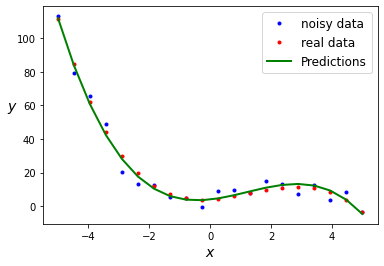

In [76]:
x_new = np.linspace(min(x),max(x), len(x)).reshape(len(x), 1) # linearly seperated points
x_new_poly = np.c_[np.ones((len(x), 1)),poly_features.transform(x_new)]
y_predict = x_new_poly.dot(theta_best)

plt.plot(x, y_noisy, "b.",label="noisy data")
plt.plot(x, y, "r.",label="real data")
plt.plot(x_new, y_predict, "g-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


### b)

In [108]:
eta = 0.0001  # learning rate
n_iterations = 100000
m = len(x)

theta = np.random.randn(4,1)  # random initialization
x_poly = np.c_[np.ones((len(x), 1)),poly_features.transform(x.reshape(len(x), 1))]

for iteration in range(n_iterations):
    gradients = 2/m * x_poly.T.dot(x_poly.dot(theta) - y_noisy.reshape(len(y), 1))
    theta = theta - eta * gradients

In [109]:
theta

array([[ 3.92522913],
       [ 2.03267046],
       [ 1.99020694],
       [-0.54790243]])

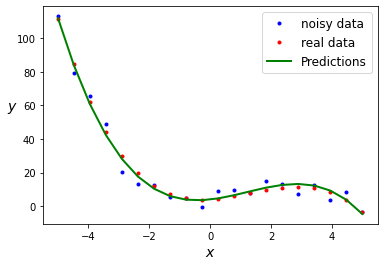

In [110]:
x_new = np.linspace(min(x),max(x), len(x)).reshape(len(x), 1) # linearly seperated points
x_new_poly = np.c_[np.ones((len(x), 1)),poly_features.transform(x_new)]
y_predict = x_new_poly.dot(theta)

plt.plot(x, y_noisy, "b.",label="noisy data")
plt.plot(x, y, "r.",label="real data")
plt.plot(x_new, y_predict, "g-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


## Q8

### a

In [130]:
from sklearn.datasets import load_digits 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,classification_report

In [118]:
x, y = load_digits(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [120]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

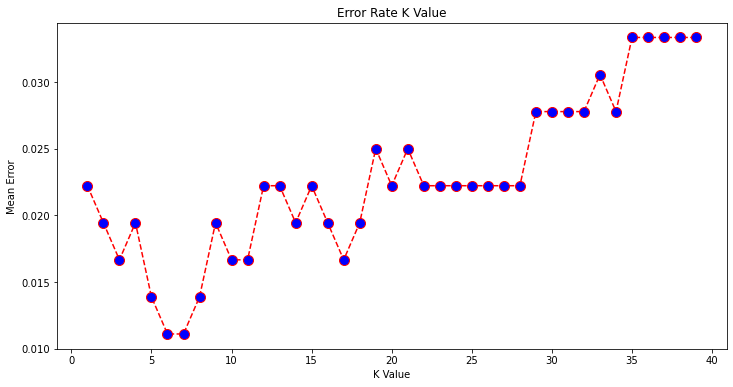

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [122]:
print(error[6],error[7])

0.011111111111111112 0.013888888888888888


In [128]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

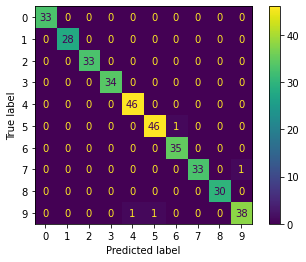

In [129]:
plot_confusion_matrix(KNN,x_test,y_test)  
plt.show()

In [133]:
y_pred = KNN.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### b

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)

GaussianNB()

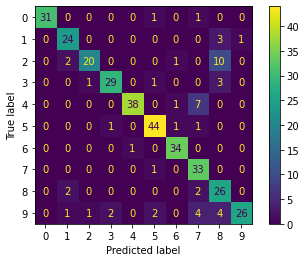

In [137]:
plot_confusion_matrix(gaussian,x_test,y_test)  
plt.show()

In [138]:
y_pred = gaussian.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360



## Q9

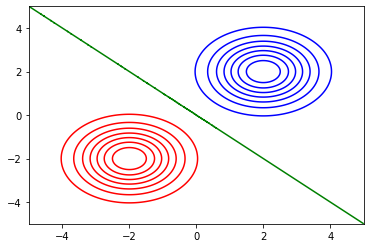

In [197]:
import matplotlib.pyplot as plt
import numpy as np
from   scipy.stats import multivariate_normal

u11 , s11 = [-2, -2],[[1, 0], [0, 1]]
u12 , s12 = [2, 2],[[1,0], [0, 1]]
normal11 = multivariate_normal(u11 , s11)
normal12 = multivariate_normal(u12 , s12)

N    = 200
X    = np.linspace(-5, 5, N)
Y    = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)
pos  = np.dstack((X, Y))

plt.contour(X, Y, normal11.pdf(pos),colors='red')
plt.contour(X, Y, normal12.pdf(pos),colors='blue')
plt.contour(X, Y,normal11.pdf(pos)- normal12.pdf(pos),levels=[0],colors='green')
plt.show()

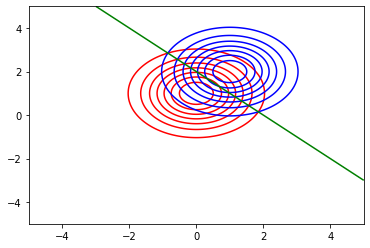

In [203]:
u21 , s21 = [0, 1],[[1, 0], [0, 1]]
u22 , s22 = [1, 2],[[1,0], [0, 1]]
normal21 = multivariate_normal(u21 , s21)
normal22 = multivariate_normal(u22 , s22)
plt.contour(X, Y, normal21.pdf(pos),colors='red')
plt.contour(X, Y, normal22.pdf(pos),colors='blue')
plt.contour(X, Y,normal21.pdf(pos)- normal22.pdf(pos),levels=[0],colors='green')
plt.show()